In [1]:
from dataclasses import dataclass
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
@dataclass
class euro_note:
    name: str
    value: int
    color: str
    width: int
    length: int
    weight: float
    
    def __post_init__(self):
        self.area = self.width * self.length / 100

In [3]:
zero = euro_note("0", 0, "#000000", 0, 0, 0)
five = euro_note("5", 5, "#70767d", 120, 62, 0.68)
ten =  euro_note("10", 10, "#953946", 127, 67, 0.72)
twenty = euro_note("20", 20, "#264d6a", 133, 72, 0.81)
fifty = euro_note("50", 50, "#e8ac78", 140, 77, 0.92)
hundred = euro_note("100", 100, "#3d6c35", 147, 82, 1.02)
two_hundred = euro_note("200", 200, "#d9c864", 153, 82, 1.07)
five_hundred = euro_note("500", 500, "#703b67", 160, 82, 1.12)

In [56]:
notes = [five, ten, twenty, fifty, hundred, two_hundred, five_hundred]

In [57]:
areas = [note.area for note in notes]
values = [note.value for note in notes]
colors = [note.color for note in notes]

Text(0.5, 0, 'Area (cm²)')

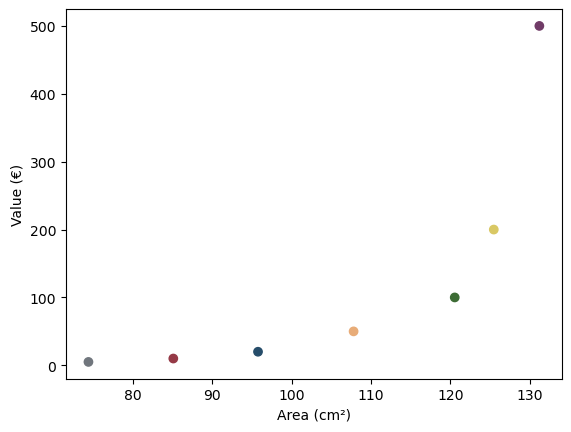

In [58]:
fig, ax = plt.subplots()
ax.scatter(areas, values, c=colors)
ax.set_ylabel("Value (€)")
ax.set_xlabel("Area (cm²)")

In [89]:
# Fit functions

def quadratic_fit(x, a, b, c):  # nope
    return a * x**2 + b * x + c


def exponential_fit(x, a, b, c):  # jop
    return c + a ** (x + b)

In [90]:
fit_function = exponential_fit

In [91]:
params, _ = curve_fit(fit_function, areas, values, p0=[4, 1, 1])
params

array([  1.17892006, -93.67556908,  17.34708813])

In [92]:
def predicted_y(func, params):
    continuous_areas = np.linspace(70, 150, 100)
    pred_values = [func(value, *params) for value in continuous_areas]
    return continuous_areas, pred_values

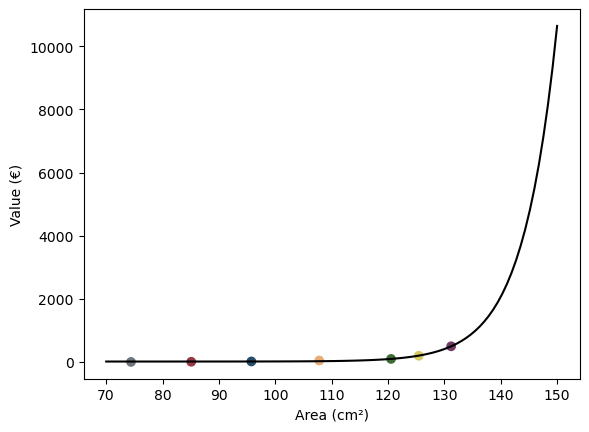

In [109]:
continuous_areas, pred_values = predicted_y(fit_function, params)

fig, ax = plt.subplots()

ax.scatter(areas, values, c=colors)
ax.plot(continuous_areas, pred_values, c="black")


ax.set_ylabel("Value (€)")
ax.set_xlabel("Area (cm²)");

In [101]:
a4_area = 210 * 297 / 100
print(f'A4 area: {a4_area} cm²')

A4 area: 623.7 cm²


In [102]:
print(f'500€ note area: {five_hundred.area} cm²')

500€ note area: 131.2 cm²


In [105]:
a4_value = fit_function(a4_area, *params)
print(f'A4€ note value: {a4_value} €')

A4€ note value: 7.7349112122473005e+37 €


In [110]:
a5_area = 148 * 210 / 100
print(f'A5 area: {a5_area} cm²')
a5_value = fit_function(a5_area, *params)
print(f'A5€ note value: {a5_value} €')

A5 area: 310.8 cm²
A5€ note value: 3318946165264865.5 €
